# Russian Car Plate Detection with OpenCV and TesseractOCR

Author: Kenneth Leung  
Last updated: 27 Dec 2020

## Contents
- [Section 1 - Car Plate Detection with OpenCV and Haar Cascade](#section-1) 
- [Section 2 - Car Plate Text Extraction with TesseractOCR](#section-2)  

___
<a name="section-1"></a>
## 1 - Car Plate Detection with OpenCV and Haar Cascade

#### Getting started with image preparation

In [1]:
# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract

# Set tesseract path to where the tesseract exe file is located
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [2]:
# Read car image and convert color to RGB
carplate_img = cv2.imread('./images/car_image.png')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

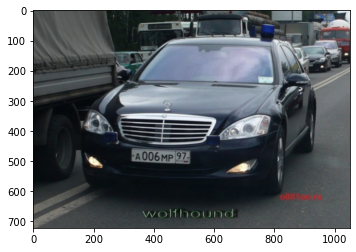

In [3]:
plt.imshow(carplate_img_rgb);

Image source: https://qph.fs.quoracdn.net/main-qimg-a73dc3a311099274cd4158c969f9e02e

In [4]:
# Function to enlarge the plt display for user to view more clearly
def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

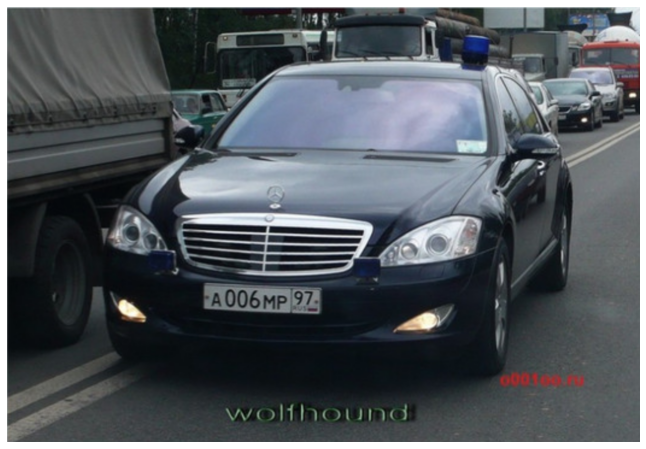

In [5]:
enlarge_plt_display(carplate_img_rgb, 1.2)

In [6]:
# Import Haar Cascade XML file for Russian car plate numbers
carplate_haar_cascade = cv2.CascadeClassifier('./haar_cascades/haarcascade_russian_plate_number.xml')

In [7]:
# Setup function to 
def carplate_detect(image):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=3) 

    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

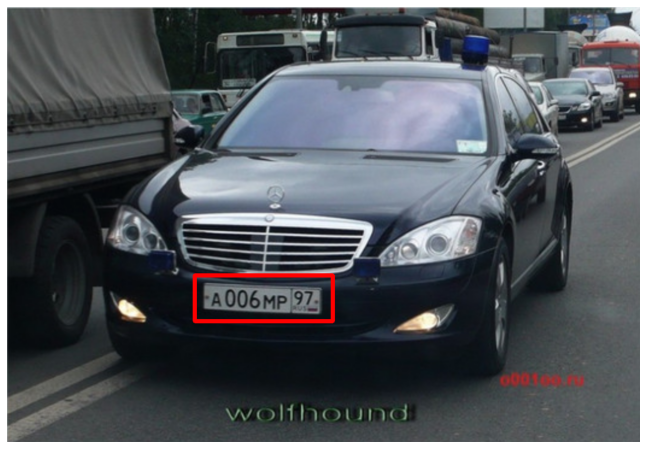

In [8]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.2)

___
<a name="section-2"></a>
## 2 - Extract Car Plate Text with TesseractOCR

#### Extract car license plate

In [9]:
# Function to retrieve only the car plate sub-image itself
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=3) 

    for x,y,w,h in carplate_rects: 
        carplate_img = image[y:y+h-15 ,x+15:x+w-20] 
        
    return carplate_img

In [10]:
# Enlarge image for manipulation later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

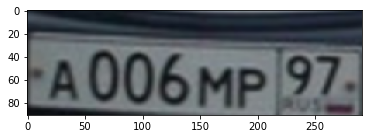

In [11]:
# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
#plt.savefig('./images/carplate_extract.png')
plt.imshow(carplate_extract_img);

#### Begin series of image processing to improve accuracy of TesseractOCR's results

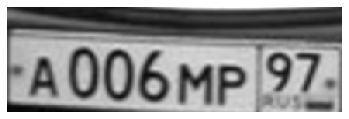

In [12]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_BGR2GRAY)
plt.axis('off') 
#plt.savefig('./images/carplate_extract_gray.png')
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

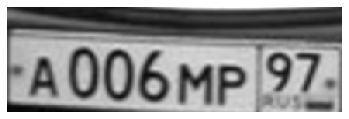

In [13]:
# Apply median blur
carplate_extract_img_blur = cv2.medianBlur(carplate_extract_img_gray,5)
plt.axis('off') 
#plt.savefig('./images/carplate_extract_gray_blur.png')
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

In [14]:
# Display the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_blur, config = f'--psm 7 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

A006MP97



Awesome, the text above does match with the image we have.

In [15]:
# Testing out the other PSM values
for i in range(3,14):
    print(f'PSM: {i}')
    print(pytesseract.image_to_string(carplate_extract_img_blur, config = f'--psm {i} --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

PSM: 3
A006MP97

PSM: 4
A006MP97

PSM: 5
O
S

PSM: 6
A006MP97

PSM: 7
A006MP97

PSM: 8
A006MP97

PSM: 9
PAQO6M97

PSM: 10
A006MP97

PSM: 11

PSM: 12

PSM: 13
A006MP97



### Talk about
- Why choose car plate (because other faces and cats are overdone)
- What is detect multiscale, and what are the parameters of scaleFactor and minNeighbors
- Tessaract (what it is, and how to setup - see Stackoverflow)
- List of PSM (should choose 7, but run all)
- Test on car plate of another country 

### References
- https://github.com/opencv/opencv/tree/master/data/haarcascades
- https://www.tutorialkart.com/opencv/python/
- https://nanonets.com/blog/ocr-with-tesseract
- https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i
- https://stackoverflow.com/questions/44619077/pytesseract-ocr-multiple-config-options
- https://stackoverflow.com/questions/42091772/pytesseract-restricting-ocr-to-a-set-of-characters
- REmove: https://www.geeksforgeeks.org/license-plate-recognition-with-opencv-and-tesseract-ocr/